In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [4]:
ROOT_DIR = "C:\\Users\\Aditya Singh\\Downloads\\Project\\Brain Tumor Data Set"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('no', 15), ('yes', 17)])

In [5]:
def dataFolder(p, split):
    if not os.path.exists("./"+p):
        os.mkdir("./"+p)
    
        for dir in os.listdir(ROOT_DIR):
            os.makedirs("./"+p+"/"+dir)
        
            for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)), 
                                    size = (math.floor(split*number_of_images[dir])-5), replace=False):
                O = os.path.join(ROOT_DIR,dir,img)
                D = os.path.join("./"+p, dir)
                shutil.copy(O,D)
                os.remove(O)
    else:
        print(f"{p} Folder exist")

In [6]:
dataFolder("train", 0.7)

train Folder exist


In [7]:
dataFolder("val", 0.15)

val Folder exist


In [8]:
dataFolder("test", 0.15)

test Folder exist


In [9]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [10]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = (224,224,3) ))

model.add(Conv2D(filters = 36, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2) ))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2) ))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2) ))

model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [11]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [12]:
def preprocessingimage1(path):
    image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rescale = 1/255, horizontal_flip = True)
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')
    
    return image

In [13]:
path = "C:\\Users\\Aditya Singh\\Downloads\\Project\\train"
train_data = preprocessingimage1(path)

Found 1435 images belonging to 2 classes.


In [14]:
def preprocessingimage2(path):
    image_data = ImageDataGenerator(rescale = 1/255)
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')
    
    return image

In [15]:
path = "C:\\Users\\Aditya Singh\\Downloads\\Project\\test"
test_data = preprocessingimage2(path)

Found 299 images belonging to 2 classes.


In [16]:
path = "C:\\Users\\Aditya Singh\\Downloads\\Project\\val"
val_data = preprocessingimage2(path)

Found 299 images belonging to 2 classes.


In [23]:
# #early stoping model
from keras.callbacks import ModelCheckpoint, EarlyStopping
# #earlyStoping
# es = EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 5, verbose = 1, mode = 'auto')
# #model checkpoint
mc = ModelCheckpoint(monitor = "val_accuracy", filepath ="./bestmodel.h5", verbose = 1, save_best_only = True, mode = 'auto')

cd = [es, mc]

In [24]:
#model Training

In [30]:
# hs = model.fit_generator(generator = train_data, 
#                          steps_per_epoch = 8, 
#                          epochs = 30, 
#                          verbose = 1, 
#                          validation_data = val_data, 
#                          validation_steps = 16,
#                         callbacks = cd)
# start_time = time.time()

hs = model.fit_generator(generator = train_data, epochs=10, validation_data=val_data, callbacks = cd)

# end_time = time.time()
# execution_time = (end_time - start_time)
# print(f"Elapsed time: {hms_string(execution_time)}")

C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_22000\3122764996.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs = model.fit_generator(generator = train_data, epochs=10, validation_data=val_data, callbacks = cd)


Epoch 1/10
45/45 [==============================] - ETA: 0s - loss: 0.4613 - accuracy: 0.7895
Epoch 1: val_accuracy improved from -inf to 0.75585, saving model to .\bestmodel.h5
45/45 [==============================] - 51s 1s/step - loss: 0.4613 - accuracy: 0.7895 - val_loss: 0.4746 - val_accuracy: 0.7559
Epoch 2/10
45/45 [==============================] - ETA: 0s - loss: 0.4352 - accuracy: 0.7930
Epoch 2: val_accuracy improved from 0.75585 to 0.78595, saving model to .\bestmodel.h5
45/45 [==============================] - 52s 1s/step - loss: 0.4352 - accuracy: 0.7930 - val_loss: 0.4274 - val_accuracy: 0.7860
Epoch 3/10
45/45 [==============================] - ETA: 0s - loss: 0.4474 - accuracy: 0.7979
Epoch 3: val_accuracy improved from 0.78595 to 0.78930, saving model to .\bestmodel.h5
45/45 [==============================] - 53s 1s/step - loss: 0.4474 - accuracy: 0.7979 - val_loss: 0.4025 - val_accuracy: 0.7893
Epoch 4/10
45/45 [==============================] - ETA: 0s - loss: 0.402

In [31]:
h = hs.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

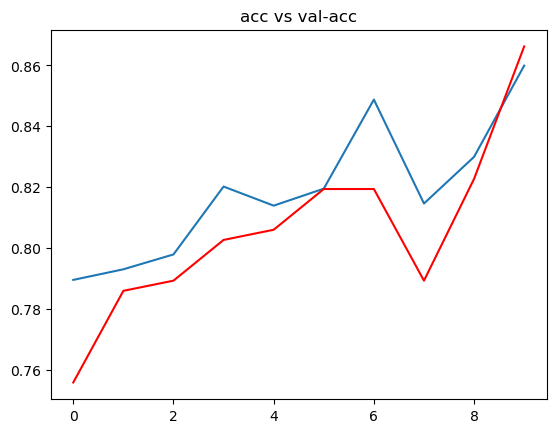

In [32]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")

plt.title("acc vs val-acc")
plt.show()

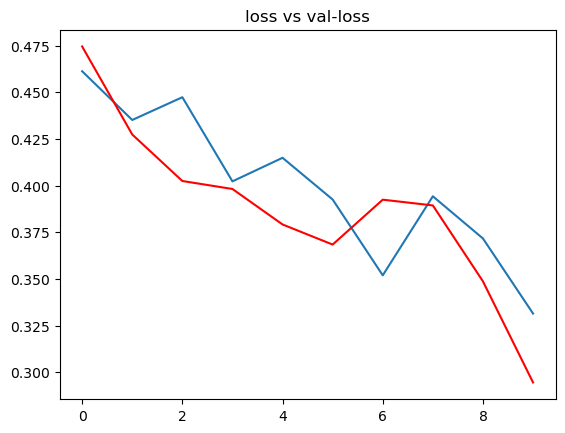

In [33]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")

plt.title("loss vs val-loss")
plt.show()

In [34]:
#Model Accuracy
from keras.models import load_model

model = load_model("C:\\Users\\Aditya Singh\\Downloads\\Project\\bestmodel.h5")

In [35]:
acc = model.evaluate_generator(test_data)[1]
print(f"the accuracy of our model is {acc*100} %")

C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_22000\2584613112.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_data)[1]


the accuracy of our model is 86.95651888847351 %


In [36]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


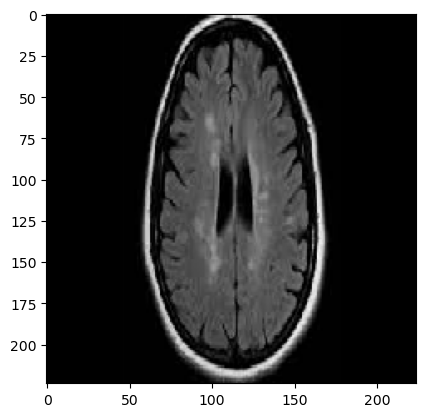

1/1 [==============================] - 0s 28ms/step
the mri is having a tumor


In [41]:
path = "C:\\Users\\Aditya Singh\\Downloads\\Project\\Brain-Tumor-Detection-master\\no\\13 no.jpg"
img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

pred = model.predict(input_arr)[0][0]
pred

if pred == 0:
    print("the mri have Brain Tumor")
else:
    print("the mri is not having a tumor")